## **<font color='white gray'>Business Analytics and Machine Learning for Data Science Projects</font>**

#### **<font color='white gray '>Predicting Maintenance for Industrial Machines</font>**


## **Installing and Loading Packages**


In [127]:
# To update a package, run the following command in the terminal or command prompt:
# pip install -U package_name

# To install an exact version of a package, run the following command in the terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the Jupyter notebook.

#1. Install the `watermark` package.
#1.a. This package is used to record the versions of other packages used in this Jupyter notebook.
!pip install -q -U watermark


In [128]:
!pip install -q xgboost

In [129]:
# 1.Import
# For object serialization
import pickle

# Scikit-learn library
import sklearn as sk

# For DataFrame manipulation
import pandas as pd

# For numerical operations
import numpy as np

# For statistical visualizations
import seaborn as sns

# For plotting graphs
import matplotlib.pyplot as plt

# For machine learning models
import xgboost as xgb

# For XGBClassifier
from xgboost import XGBClassifier

# For logistic regression
from sklearn.linear_model import LogisticRegression

# For Naive Bayes classification
from sklearn.naive_bayes import GaussianNB

# For data scaling
from sklearn.preprocessing import StandardScaler

# For cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV

# For model evaluation metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display plots in Jupyter/Colab
%matplotlib inline

In [130]:
%reload_ext watermark
%watermark -a "panData"

Author: panData



## **Step 1 - Defining and Understanding the Problem to Be Solved**

**Objective**: Predict whether an industrial machine requires maintenance using 178 readings from IoT (Internet of Things) sensors.


## **Step 2 - Data Understanding**

We will work with historical data collected from IoT sensors on industrial machines. The data is fictional.

Each row in the dataset contains 178 readings, corresponding to columns from different sensors. In other words, there are 178 columns representing IoT sensor readings. In total, there are 11,500 rows and 179 columns, with the last column indicating the status of the industrial machine, specifying whether it required maintenance.

The data is fictional.


## **Step 3 - Loading the Data**

In [131]:
#2. Loading the dataset.
df = pd.read_csv("dataset.csv")

In [132]:
#3. Checking the dataset's shape.
df.shape

(11500, 179)

In [133]:
#4. Viewing sample records.
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET_VARIABLE
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


## **Step 4 - Exploratory Data Analysis and Target Variable Definition**


In the last column, the value `1` represents the positive class (the machine required maintenance), while the value `0` represents the negative class (the machine did not require maintenance). This will be our target variable.


In [134]:
#5. Generating statistical summary.
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET_VARIABLE
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [135]:
#6. Printing the number of columns.
print("Number of columns:", len(df.columns))

Number of columns: 179


In [136]:
#7. Checking for missing values.
df.isna().sum().sum()

0

### **Calculating the Prevalence of the Positive Class**


Prevalence is the percentage of samples exhibiting the characteristic you are trying to predict. In this specific scenario, it means that machines requiring maintenance represent the positive class (event occurrence), while those not requiring maintenance represent the negative class (non-occurrence of the event).

The rate is calculated as `(number of positive samples / total number of samples)`. For example, a prevalence rate of `0.2` indicates that 20% of the sample consists of machines that required maintenance.


In [137]:
#8. Function to calculate the prevalence of the positive class (label = 1).
def calculate_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

In [138]:
#9. Printing the prevalence of the positive class.
print("Prevalence of the positive class: %.3f" % calculate_prevalence(df["TARGET_VARIABLE"].values))

Prevalence of the positive class: 0.200


## **Step 5 - Data Cleaning**

In [139]:
#10. Preparing the dataset with only the relevant data.
collist = df.columns.tolist()
cols_input = collist[0:178]
df = df[cols_input + ["TARGET_VARIABLE"]]

In [140]:
#11. Viewing the first few records of the prepared dataset.
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET_VARIABLE
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [141]:
#12. Checking for duplicate columns in the input data.
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "There are duplicate columns."

set()


In [142]:
#13. Checking for duplicate columns in the final dataset.
cols_df = list(df.columns)
dup_cols = set([x for x in cols_df if cols_df.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "There are duplicate columns."

set()


## **Step 6 - Splitting the Data into Training, Validation, and Testing Sets**


The training set is used to train our machine learning algorithm, so we aim to use the majority of our dataset for this purpose. The validation set is used to fine-tune hyperparameters and select the best-performing approach. The test set is used to evaluate the accuracy of our machine learning model.

Typically, the dataset can be split into 50/25/25, 60/20/20, or 70/15/15 ratios for training/validation/testing. This also depends on the number of samples available. If the dataset is extremely large (hundreds of millions of rows), we might use a split like 98/1/1.


In [143]:
#14. Viewing the first few records of the final dataset.
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET_VARIABLE
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [144]:
#15. Generating random samples from the data.
df = df.sample(n=len(df))

In [145]:
#16. Resetting the dataset indices.
df = df.reset_index(drop=True)

In [146]:
#17. Generating an index for the split.
df_valid_test = df.sample(frac=0.3)
print("Size of validation/test split: %.1f" % (len(df_valid_test) / len(df)))

Size of validation/test split: 0.3


In [147]:
#18. Performing a 70/15/15 split.

# Test data
df_test = df_valid_test.sample(frac=0.5)

# Validation data
df_valid = df_valid_test.drop(df_test.index)

# Training data
df_train = df.drop(df_valid_test.index)

In [148]:
#19. Checking the prevalence in each subset.
print("Test (n = %d): %.3f" % (len(df_test), calculate_prevalence(df_test.TARGET_VARIABLE.values)))
print("Validation (n = %d): %.3f" % (len(df_valid), calculate_prevalence(df_valid.TARGET_VARIABLE.values)))
print("Train (n = %d): %.3f" % (len(df_train), calculate_prevalence(df_train.TARGET_VARIABLE.values)))

Test (n = 1725): 0.193
Validation (n = 1725): 0.187
Train (n = 8050): 0.204


In [149]:
#20. Verifying that all samples are accounted for.
print('All samples (n = %d)' % len(df))
assert len(df) == (len(df_test) + len(df_valid) + len(df_train)), 'Something went wrong'

All samples (n = 11500)


We aim to balance our dataset to avoid creating a model that incorrectly classifies samples as belonging to the majority class. For example, in a fraud detection dataset where most cases are "Not Fraud," the classification model would likely favor the "Not Fraud" class, leading to misleading results.

Balancing the dataset ensures that the proportions of each class are the same, preventing the creation of an "imbalanced" model.

Since we have 2,300 positive samples, we can use the undersampling method to randomly select a subset of the negative samples.


## **Step 7 - Class Balancing**

Class balancing is applied only to the training data.


In [150]:
#21. Creating an index for positive class samples.
rows_pos = df_train.TARGET_VARIABLE == 1

In [151]:
#22. Defining positive and negative class values from the index.
df_train_pos = df_train.loc[rows_pos]
df_train_neg = df_train.loc[~rows_pos]

In [152]:
#23. Determining the minimum value between positive and negative class samples.
n = np.min([len(df_train_pos), len(df_train_neg)])

In [153]:
#24. Obtaining random samples for the balanced training dataset.
df_train_final = pd.concat([df_train_pos.sample(n=n, random_state=64),
                            df_train_neg.sample(n=n, random_state=64)],
                           axis=0,
                           ignore_index=True)

In [154]:
#25. Sampling and resetting the index for the final training dataset.
df_train_final = df_train_final.sample(n=len(df_train_final), random_state=64).reset_index(drop=True)

In [155]:
#26. Printing the class balance in the training dataset.
print('Training Balance (n = %d): %.3f' % (len(df_train_final),
                                           calculate_prevalence(df_train_final.TARGET_VARIABLE.values)))

Training Balance (n = 3290): 0.500


### **Key Class Balancing Techniques**

**Undersampling**: This technique reduces the number of majority class examples to match the number of minority class examples. In other words, it decreases the dataset size by randomly removing records from the majority class. While this helps balance the dataset, it may lead to a loss of important information as many majority class data points are discarded.

**Oversampling**: Conversely, oversampling increases the number of minority class examples to match the number of majority class examples. This is often done by replicating minority class records or generating synthetic data. While this approach retains all majority class information and increases the dataset size, it can lead to overfitting, where the model overly learns the specifics of the replicated minority class or introduces dataset bias.


In [156]:
#27. Saving all datasets to disk in CSV format.
df_train.to_csv('train_data.csv', index=False)
df_train_final.to_csv('train_data_balanced.csv', index=False)
df_valid.to_csv('validation_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)

In [157]:
#28. Saving the input data (predictor columns) for later use.
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

> Creating the X and Y Matrices.


In [158]:
#29. Defining the feature matrices (X).
X_train = df_train_final[cols_input].values
X_valid = df_valid[cols_input].values

In [159]:
#30. Defining the target vectors (Y).
y_train = df_train_final['TARGET_VARIABLE'].values
y_valid = df_valid['TARGET_VARIABLE'].values

In [160]:
#31. Printing the shapes of training and validation datasets.
print('Shape of training data:', X_train.shape, y_train.shape)
print('Shape of validation data:', X_valid.shape, y_valid.shape)

Shape of training data: (3290, 178) (3290,)
Shape of validation data: (1725, 178) (1725,)


In [161]:
#32. Displaying the training feature matrix.
X_train

array([[ -32,  -16,   -4, ...,   -4,   -1,    5],
       [  56,   49,   58, ...,   70,   90,  104],
       [ 104,  176,  190, ...,  -53,  -57,  -57],
       ...,
       [   2,    5,    7, ...,  143,  151,  157],
       [-113, -111,  -90, ...,  129,  101,   41],
       [ -68,  -52,  -51, ...,   56,   51,   47]])

## Step 8 - Standardization

Standardization in data preprocessing is a crucial technique when building classification models, as well as many other types of machine learning models. This is due to several important reasons:

**Data Scale**: Different variables can operate on vastly different scales. For example, a dataset might include an individual's age (ranging from 0 to 100) and their salary (ranging from thousands to tens of thousands). A machine learning model might assign greater importance to variables with higher magnitudes simply because of their scale, potentially leading to suboptimal performance.

**Faster Convergence**: Many machine learning algorithms, especially those using gradient descent as the optimization method (e.g., logistic regression, neural networks), converge faster when the data is standardized. Standardization helps ensure that gradient descent does not get stuck adjusting weights due to disproportionate scales.

**Interpretability**: When variables are standardized, it is easier to directly interpret the importance of each variable in the model. For linear models, for instance, the coefficients can be interpreted as the relative importance of each variable, assuming all variables are on the same scale.


In [162]:
#33. Creating the scaler object for standardization.
scaler = StandardScaler()

In [163]:
#34. Fitting the scaler to the training data.
scaler.fit(X_train)

StandardScaler()

In [164]:
#35. Saving the scaler object to disk for future use.
scalerfile = 'scaler.sav'

In [165]:
#36. Saving and loading the scaler object using pickle.
pickle.dump(scaler, open(scalerfile, 'wb'))  # Save the scaler object to disk.
scaler = pickle.load(open(scalerfile, 'rb'))  # Load the scaler object for future use.

In [166]:
#37. Applying standardization to the data matrices.
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [167]:
#38. Displaying the transformed training feature matrix.
X_train_tf

array([[-0.08044778, -0.01914189,  0.02621051, ...,  0.04005949,
         0.05902956,  0.09245489],
       [ 0.27892949,  0.24521029,  0.2799923 , ...,  0.34729497,
         0.43815343,  0.50033084],
       [ 0.47495345,  0.76171378,  0.8203019 , ..., -0.16338022,
        -0.17427744, -0.16298258],
       ...,
       [ 0.05840253,  0.0662642 ,  0.07123632, ...,  0.65037863,
         0.69229141,  0.71868868],
       [-0.41123822, -0.40550277, -0.32580938, ...,  0.592253  ,
         0.48398159,  0.24077342],
       [-0.22746575, -0.16555233, -0.16617245, ...,  0.28916934,
         0.27567177,  0.26549317]])

## **Step 9 - Predictive Modeling**


We will create helper functions for metric calculation.

In [168]:
#39. Function to calculate specificity.
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [169]:
#40. Function to generate a metrics report.
def print_report(y_actual, y_pred, thresh):
    #40.a. Calculate AUC.
    auc = roc_auc_score(y_actual, y_pred)

    #40.b. Calculate accuracy.
    accuracy = accuracy_score(y_actual, (y_pred > thresh))

    #40.c. Calculate recall.
    recall = recall_score(y_actual, (y_pred > thresh))

    #40.d. Calculate precision.
    precision = precision_score(y_actual, (y_pred > thresh))

    #40.e. Calculate specificity.
    specificity = calc_specificity(y_actual, y_pred, thresh)

    print('AUC: %.3f' % auc)
    print('Accuracy: %.3f' % accuracy)
    print('Recall: %.3f' % recall)
    print('Precision: %.3f' % precision)
    print('Specificity: %.3f' % specificity)
    print(' ')

    return auc, accuracy, recall, precision, specificity

The metrics above are commonly used to evaluate the performance of classification models in machine learning. Each of them provides different insights into the quality of the model's predictions. Let's describe them:

**AUC (Area Under the ROC Curve)**: The AUC metric refers to the area under the ROC (Receiver Operating Characteristic) curve. The ROC curve is a plot that shows the performance of a classification model at all classification thresholds. This curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different thresholds. AUC ranges from 0 to 1, where a model with an AUC of 1 is a perfect classifier, and a model with an AUC of 0.5 performs no better than random chance.

**Accuracy**: Accuracy is the fraction of correct predictions (both true positives and true negatives) among the total cases examined. It is calculated as (true positives + true negatives) / (total cases). While accuracy can provide a quick measure of the overall effectiveness of the model, it can be misleading in imbalanced datasets, where one class is much more frequent than the other.

**Recall (Sensitivity or True Positive Rate)**: Recall is the proportion of actual positives that were correctly identified by the model, calculated as (true positives) / (true positives + false negatives). It is an important measure when the cost of failing to detect a true positive is high.

**Precision**: Precision is the proportion of positive predictions that are actually positive, calculated as (true positives) / (true positives + false positives). High precision indicates a low false positive rate. It is particularly important in situations where false positives are costly.

**Specificity**: Specificity is the proportion of actual negatives that were correctly identified as such, calculated as (true negatives) / (true negatives + false positives). It is not directly calculated by scikit-learn, but can be derived from the confusion matrix or computed through a custom function like `dsa_calc_specificity`. Specificity is crucial in contexts where minimizing false positives is important.


Since we have balanced our training data, we will set the threshold at 0.5 to label a predicted sample as positive.


In [170]:
#41. Setting the threshold to 0.5 for labeling predicted samples as positive.
thresh = 0.5

### **Version 1 - Linear Models**

For version 1, we will use a **linear model** for classification, **logistic regression**.

The **logistic regression** algorithm is a machine learning technique used to predict a **binary outcome**. This means it is used to decide between two possible options, such as **yes or no**, **true or false**, **success or failure**.

The algorithm works by calculating the **probability** of an event occurring based on the features observed in the data. For example, **logistic regression** can be used to predict whether a customer will purchase a product or not, based on their **purchase history** and other **personal characteristics**. It is an easy-to-understand and very **powerful model**.


In [171]:
#42. Building the logistic regression model.

#42.a. Create the classifier (object)
lr = LogisticRegression(max_iter=500, random_state=142)

#42.b. Train and create the model
modelo_dsa_v1 = lr.fit(X_train_tf, y_train)

#42.c. Predictions
y_train_preds = modelo_dsa_v1.predict_proba(X_train_tf)[:, 1]
y_valid_preds = modelo_dsa_v1.predict_proba(X_valid_tf)[:, 1]

print('\nLogistic Regression\n')

print('Training:\n')
#42.d. Generate the metrics for training.
v1_train_auc, v1_train_acc, v1_train_rec, v1_train_prec, v1_train_spec = print_report(y_train,
                                                                                   y_train_preds,
                                                                                   thresh)

print('Validation:\n')
#42.e. Generate the metrics for validation.
v1_valid_auc, v1_valid_acc, v1_valid_rec, v1_valid_prec, v1_valid_spec = print_report(y_valid,
                                                                                   y_valid_preds,
                                                                                   thresh)


Logistic Regression

Training:

AUC: 0.633
Accuracy: 0.658
Recall: 0.539
Precision: 0.708
Specificity: 0.778
 
Validation:

AUC: 0.516
Accuracy: 0.703
Recall: 0.404
Precision: 0.289
Specificity: 0.772
 


### **Version 2 - Probabilistic Models**

For version 2, we will use a probabilistic algorithm, **Gaussian Naive Bayes**.

The **Gaussian Naive Bayes** algorithm is a classification method based on **Bayes' theorem**, assuming that the predictors (input features) have a **normal (Gaussian)** distribution. It is called "*naive*" because it assumes that all features are **independent** of each other, which rarely occurs in practice, but simplifies the calculations significantly. This algorithm is effective in classification problems where the features are **continuous** and presumably follow a **normal distribution**, such as in some **text classification tasks** and **medical diagnostic problems**. It calculates the **probability** of each output category based on the input features, and classifies each instance into the category with the highest **probability**.


In [172]:
#43. Building the Naive Bayes model.

#43.a. Create the classifier (object)
nb = GaussianNB()

#43.b. Train and create the model
modelo_dsa_v2 = nb.fit(X_train_tf, y_train)

#43.c. Predictions
y_train_preds = modelo_dsa_v2.predict_proba(X_train_tf)[:, 1]
y_valid_preds = modelo_dsa_v2.predict_proba(X_valid_tf)[:, 1]

print('\nNaive Bayes\n')

print('Training:\n')
#43.d. Generate the metrics for training.
v2_train_auc, v2_train_acc, v2_train_rec, v2_train_prec, v2_train_spec = print_report(y_train,
                                                                                   y_train_preds,
                                                                                   thresh)

print('Validation:\n')
#43.e. Generate the metrics for validation.
v2_valid_auc, v2_valid_acc, v2_valid_rec, v2_valid_prec, v2_valid_spec = print_report(y_valid,
                                                                                   y_valid_preds,
                                                                                   thresh)



Naive Bayes

Training:

AUC: 0.984
Accuracy: 0.933
Recall: 0.893
Precision: 0.972
Specificity: 0.974
 
Validation:

AUC: 0.988
Accuracy: 0.960
Recall: 0.885
Precision: 0.899
Specificity: 0.977
 


### **Version 3 - Decision Tree Models and Boosting**



For version 3, we will use an algorithm based on **decision trees** and the **boosting** method.

The **XGBoost** (**eXtreme Gradient Boosting**) algorithm is an advanced implementation of decision trees with boosting techniques, which are machine learning methods used to improve the accuracy of predictions. **XGBoost** builds models sequentially, where each new model tries to correct the errors of the previous one, focusing on instances that were more difficult to predict correctly.

The main advantage of **XGBoost** is its ability to efficiently handle large volumes of data and manage a variety of data types, being highly efficient in terms of **runtime** and **memory usage**. It also has features that allow it to handle **missing values** and supports multiple **loss functions**, making it suitable for a wide range of classification and regression problems.

In addition, **XGBoost** offers several features to enhance model performance and accuracy, such as **regularization** to prevent overfitting, and **tree pruning** techniques. It is widely used in **data science competitions** and **industrial applications** due to its **robustness** and **effectiveness**.


In [173]:
#44. Building the Xtreme Gradient Boosting Classifier model.

#44.a. Create the classifier (object)
xgbc = XGBClassifier()

#44.b. Train and create the model
modelo_dsa_v3 = xgbc.fit(X_train_tf, y_train)

#44.c. Predictions
y_train_preds = modelo_dsa_v3.predict_proba(X_train_tf)[:, 1]
y_valid_preds = modelo_dsa_v3.predict_proba(X_valid_tf)[:, 1]

print('\nXtreme Gradient Boosting Classifier\n')

print('Training:\n')
#44.d. Generate the metrics for training.
v3_train_auc, v3_train_acc, v3_train_rec, v3_train_prec, v3_train_spec = print_report(y_train,
                                                                                   y_train_preds,
                                                                                   thresh)

print('Validation:\n')
#44.e. Generate the metrics for validation.
v3_valid_auc, v3_valid_acc, v3_valid_rec, v3_valid_prec, v3_valid_spec = print_report(y_valid,
                                                                                   y_valid_preds,
                                                                                   thresh)



Xtreme Gradient Boosting Classifier

Training:

AUC: 1.000
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
Specificity: 1.000
 
Validation:

AUC: 0.994
Accuracy: 0.960
Recall: 0.950
Precision: 0.852
Specificity: 0.962
 


## **Step 10 - Cross-Validation**

Cross-validation is a model evaluation technique aimed at ensuring the **generalization** ability of a predictive model to an independent dataset. This method is used to estimate how well the model will perform on unseen data during training, minimizing issues like **overfitting**. In cross-validation, the dataset is split into smaller parts: one set is used to train the model (training data) and the other is used to test the model (test or validation data). The process is repeated several times (folds) with different training and test partitions, and the results are then aggregated to provide a more robust measure of the model's performance.

One of the most common cross-validation methods is **k-fold cross-validation**, where the dataset is randomly split into **k** parts (or "folds") of approximately the same size. The model is trained **k** times, each time using **k-1 folds** for training and the remaining fold for testing, ensuring that each fold is used exactly once as test data. This allows all data to be used both for training and testing, maximizing the efficiency of using available data. Cross-validation provides a more accurate estimate of the model's performance compared to a simple split of data into training and testing sets, especially in cases of limited or imbalanced datasets.

To perform cross-validation on the **Xtreme Gradient Boosting Classifier (XGBClassifier)** model, you can use the **cross_val_score** function from the **scikit-learn** library. This function allows you to evaluate the effectiveness of the model using different train/test splits, helping to provide a more robust estimate of the model's performance.


In [174]:
#45. Setting up the cross-validation process for the XGBClassifier.

#45.a. Create the classifier
xgbc = XGBClassifier()

#45.b. Configure cross-validation
# For example, using 5 splits and the AUC (Area Under the Curve) scoring metric
n_splits = 5
score = 'roc_auc'

#45.c. Perform cross-validation
cv_scores = cross_val_score(xgbc, X_train_tf, y_train, cv=n_splits, scoring=score)

#45.d. Display the results
print(f"Cross-validation with {n_splits} splits")
print(f"AUC Score in Each Split: {cv_scores}")
print(f"Average AUC Score: {np.mean(cv_scores)}")


Cross-validation with 5 splits
AUC Score in Each Split: [0.99216563 0.98986521 0.99327427 0.98876581 0.99369001]
Average AUC Score: 0.9915521844772315


## **Step 11 - Hyperparameter Optimization with GridSearchCV**

To perform hyperparameter optimization on your **XGBoost** model, you can use **GridSearchCV** or **RandomizedSearchCV** from the **scikit-learn** library. These tools automatically test various hyperparameter combinations and select the best one based on model performance.

Let's demonstrate how to use **GridSearchCV** to optimize a few hyperparameters of the **XGBoost** model. The process with **RandomizedSearchCV** would be similar, but it tests a fixed number of randomly chosen hyperparameter combinations, which can be more efficient if the hyperparameter space is very large.


In [175]:
%%time

#46. Define the classifier
xgbc = XGBClassifier()

#46.a. Define the hyperparameter space for optimization
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

#46.b. Set up GridSearchCV
grid_search = GridSearchCV(xgbc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

#46.c. Perform the search for the best hyperparameters
grid_search.fit(X_train_tf, y_train)

#46.d. Best hyperparameters found
best_params = grid_search.best_params_

#46.e. Train the model with the best hyperparameters
modelo_dsa_v4 = grid_search.best_estimator_

#46.f. Predictions with the optimized model
y_train_preds_optimized = modelo_dsa_v4.predict_proba(X_train_tf)[:, 1]
y_valid_preds_optimized = modelo_dsa_v4.predict_proba(X_valid_tf)[:, 1]

#46.g. Evaluation of the optimized model
print('\nXtreme Gradient Boosting Classifier - Optimized\n')
print('Best hyperparameters:', best_params)

print('\nTraining:\n')
v4_train_auc, v4_train_acc, v4_train_rec, v4_train_prec, v4_train_spec = print_report(y_train,
                                                                                   y_train_preds_optimized,
                                                                                   thresh)

print('Validation:\n')
v4_valid_auc, v4_valid_acc, v4_valid_rec, v4_valid_prec, v4_valid_spec = print_report(y_valid,
                                                                                   y_valid_preds_optimized,
                                                                                   thresh)



Xtreme Gradient Boosting Classifier - Optimized

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}

Training:

AUC: 1.000
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
Specificity: 1.000
 
Validation:

AUC: 0.995
Accuracy: 0.967
Recall: 0.963
Precision: 0.873
Specificity: 0.968
 
CPU times: user 18.8 s, sys: 1.36 s, total: 20.2 s
Wall time: 17min 59s


## **Step 12 - Selecting the Best Machine Learning Model**


We will create a DataFrame with all the results and plot it using **seaborn**.


In [176]:
#47. Creating a DataFrame with the calculated metrics
df_results = pd.DataFrame({'classifier': ['RL', 'RL', 'NB', 'NB', 'XGB', 'XGB', 'XGB_O', 'XGB_O'],
                           'data_set': ['train', 'validation'] * 4,
                           'auc': [v1_train_auc,
                                   v1_valid_auc,
                                   v2_train_auc,
                                   v2_valid_auc,
                                   v3_train_auc,
                                   v3_valid_auc,
                                   v4_train_auc,
                                   v4_valid_auc],
                           'accuracy': [v1_train_acc,
                                        v1_valid_acc,
                                        v2_train_acc,
                                        v2_valid_acc,
                                        v3_train_acc,
                                        v3_valid_acc,
                                        v4_train_acc,
                                        v4_valid_acc],
                           'recall': [v1_train_rec,
                                      v1_valid_rec,
                                      v2_train_rec,
                                      v2_valid_rec,
                                      v3_train_rec,
                                      v3_valid_rec,
                                      v4_train_rec,
                                      v4_valid_rec],
                           'precision': [v1_train_prec,
                                         v1_valid_prec,
                                         v2_train_prec,
                                         v2_valid_prec,
                                         v3_train_prec,
                                         v3_valid_prec,
                                         v4_train_prec,
                                         v4_valid_prec],
                           'specificity': [v1_train_spec,
                                           v1_valid_spec,
                                           v2_train_spec,
                                           v2_valid_spec,
                                           v3_train_spec,
                                           v3_valid_spec,
                                           v4_train_spec,
                                           v4_valid_spec]})


The chosen performance metric will be the **AUC Score** of the validation set. It is the ideal score for comparing models of different algorithms.


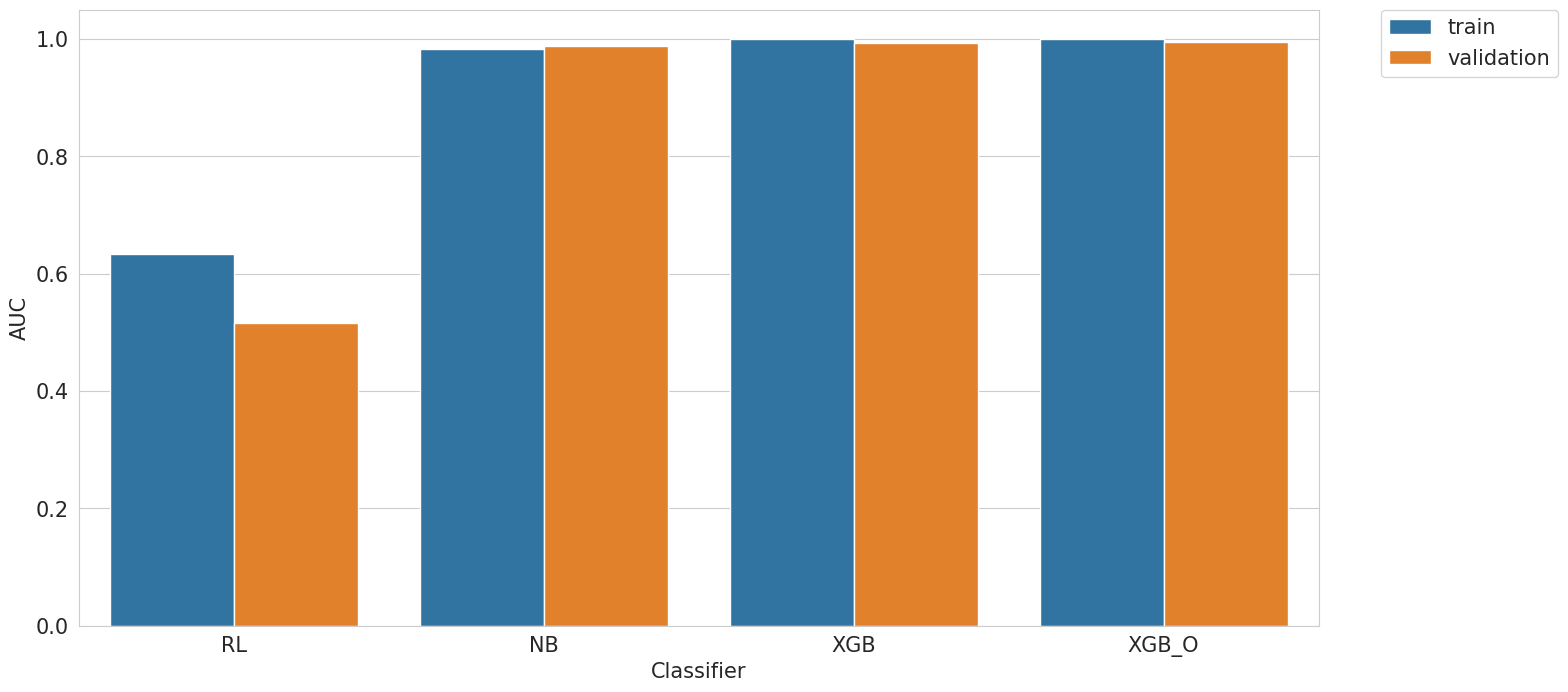

In [177]:
#48. Building the plot

#48.a. Set the plot style
sns.set_style("whitegrid")
#48.b. Set the figure size
plt.figure(figsize=(16, 8))

#48.c. Bar plot
ax = sns.barplot(x='classifier', y='auc', hue='data_set', data=df_results)
#48.d. Set the x-axis label
ax.set_xlabel('Classifier', fontsize=15)
#48.e. Set the y-axis label
ax.set_ylabel('AUC', fontsize=15)
#48.f. Set the tick label size
ax.tick_params(labelsize=15)

#48.g. Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
#48.h. Display the plot
plt.show()


In [178]:
#47. Displaying the comparison table of models
df_results

,classifier,data_set,auc,accuracy,recall,precision,specificity
0,RL,train,0.633311,0.658359,0.539210,0.707901,0.777508
1,RL,validation,0.515597,0.703188,0.403727,0.288889,0.771917
2,NB,train,0.983768,0.933435,0.893009,0.971561,0.973860
3,NB,validation,0.987560,0.960000,0.885093,0.899054,0.977192
4,XGB,train,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGB,validation,0.994097,0.960000,0.950311,0.852368,0.962224
6,XGB_O,train,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB_O,validation,0.995026,0.966957,0.962733,0.873239,0.967926


We will use the **AUC Score** in validation as the criterion for model selection.


In [179]:
#48. Comparison table of models with metrics in validation, sorted by AUC
df_results[df_results['data_set'] == 'validation'].sort_values(by='auc', ascending=False)

,classifier,data_set,auc,accuracy,recall,precision,specificity
7,XGB_O,validation,0.995026,0.966957,0.962733,0.873239,0.967926
5,XGB,validation,0.994097,0.960000,0.950311,0.852368,0.962224
3,NB,validation,0.987560,0.960000,0.885093,0.899054,0.977192
1,RL,validation,0.515597,0.703188,0.403727,0.288889,0.771917


Considering the **AUC Score**, our best model is the **XGBoost Classifier Optimized (version 4)**. This will be our choice.

**Note: When running on your machine, the values may differ due to the floating-point precision of your computer's CPU. Adjust your decision accordingly.**


## **Saving the Best Model**


In [180]:
#49. Saving the best model to disk
pickle.dump(modelo_dsa_v4, open('best_model.pkl', 'wb'), protocol=4)

## **Step 13 - Evaluation and Interpretation of Metrics**


In [191]:
#50. Loading the best model, columns, and scaler

# Load the best model from disk
best_model = pickle.load(open('best_model.pkl', 'rb'))

# Load the input columns and scaler
cols_input = pickle.load(open('cols_input.sav', 'rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# Load the data
df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('validation_data.csv')
df_test = pd.read_csv('test_data.csv')

# Create the X and Y matrices

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['TARGET_VARIABLE'].values
y_valid = df_valid['TARGET_VARIABLE'].values
y_test = df_test['TARGET_VARIABLE'].values

# Apply the transformation to the data
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

> Calculating the predictions in probability format.


In [192]:
#51. Calculating the probabilities

y_train_preds = best_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:, 1]
y_test_preds = best_model.predict_proba(X_test_tf)[:, 1]

> Performance Evaluation.


In [193]:
#52. Performance Evaluation.

thresh = 0.5

print('\nTraining:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                         y_train_preds,
                                                                                         thresh)

print('\nValidation:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                         y_valid_preds,
                                                                                         thresh)

print('\nTest:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                        y_test_preds,
                                                                                        thresh)


Training:

AUC: 0.999
Accuracy: 0.980
Recall: 1.000
Precision: 0.909
Specificity: 0.974
 

Validation:

AUC: 0.995
Accuracy: 0.967
Recall: 0.963
Precision: 0.873
Specificity: 0.968
 

Test:

AUC: 0.994
Accuracy: 0.966
Recall: 0.970
Precision: 0.868
Specificity: 0.965
 


> **ROC Curve**.

The **ROC curve** (**Receiver Operating Characteristic**) is a graphical tool used to evaluate the performance of binary classification models. It is plotted by using the **true positive rate** (sensitivity) against the **false positive rate** (1 - specificity) for different thresholds. Essentially, the ROC curve shows how well the model is able to distinguish between the two classes (e.g., positive and negative).

The curve can help choose the most appropriate cutoff point, balancing between capturing as many true positives as possible while minimizing false positives. One of the most commonly used indicators to measure a model's quality based on the ROC curve is the **area under the curve** (**AUC**). An **AUC** of 1.0 represents a perfect model, while an **AUC** of 0.5 indicates performance no better than random chance.


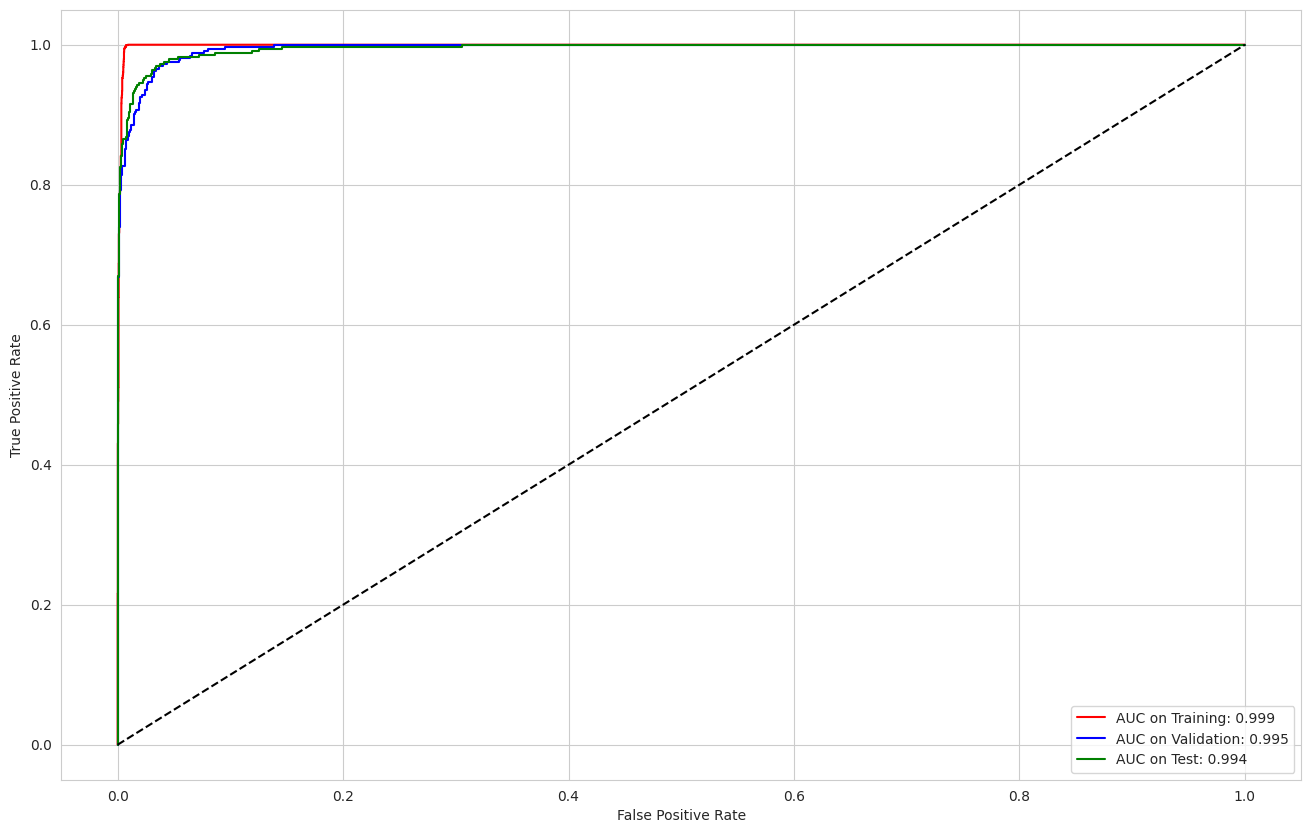

In [194]:
#53. Calculating the ROC curve and AUC for training, validation, and test data.

# Calculate the ROC curve for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calculate the ROC curve for validation data
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calculate the ROC curve for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plotting the ROC curves
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC on Training: %.3f' % auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC on Validation: %.3f' % auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC on Test: %.3f' % auc_test)
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **Step 14 - Model Deployment and Use with New Data**


In [195]:
#54. Loading new data
new_machine_data = pd.read_csv('new_data.csv')

In [196]:
#55. Viewing the first few records of the new machine data
new_machine_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [197]:
#56. Applying standardization to the new input data
new_machine_data_scaled = scaler.transform(new_machine_data)

In [198]:
#57. Displaying the scaled new machine data
new_machine_data_scaled

array([[ 0.25851033,  0.22080855,  0.18175419,  0.12041837,  0.07526264,
         0.05530042,  0.01867096,  0.00885435, -0.00275874, -0.02508236,
        -0.06214911, -0.09153052, -0.09971846, -0.09003958, -0.06488405,
        -0.05214025, -0.05208543, -0.05934872, -0.04305044, -0.03466093,
        -0.05236212, -0.02958181, -0.00402382,  0.00765881,  0.00195277,
         0.00259145,  0.02943173,  0.05601076,  0.08747057,  0.08382043,
         0.06715306,  0.01684672,  0.00255299, -0.01194345,  0.01434927,
         0.04311959,  0.08310405,  0.12312349,  0.14100177,  0.17612882,
         0.18565041,  0.19814077,  0.18260426,  0.196907  ,  0.18975096,
         0.18274039,  0.17417842,  0.14030622,  0.08840104,  0.04838364,
         0.03231266, -0.03043883, -0.09487203, -0.14752301, -0.17837724,
        -0.19471573, -0.19138057, -0.18335563, -0.17142019, -0.13619435,
        -0.10209433, -0.06622455, -0.03116883, -0.05052465, -0.04040851,
        -0.03191378, -0.01267673,  0.03964582,  0.0

In [199]:
#58. Class prediction using the best model
best_model.predict(new_machine_data_scaled)

array([0])

Based on the IoT sensor data, this machine does not require maintenance.

## **Step 15 - Project Conclusion**

Delivering the result of a Machine Learning project involves several stages that ensure the developed model is understood, evaluated, and used effectively by stakeholders. Here are the key steps to consider:

**Complete Documentation**: Include technical details on how the model was built, the data used, data preparation, the chosen algorithm, tuned parameters, and testing results. Document any data preprocessing and feature engineering choices as well.

**Model Evaluation**: Present a detailed performance evaluation using relevant metrics (such as accuracy, recall, AUC-ROC, etc.). Use visualizations like ROC curves or confusion matrices to illustrate the results clearly.

**Insights and Interpretations Report**: Provide insights into what the model reveals, including which variables are most important for predictions and how these variables influence those predictions. Model interpretability tools like **SHAP** or **LIME** can be useful here.

**Practical Demonstration**: If possible, create a demonstration or prototype that shows how the model works in an operational environment. This could be a web application, an interactive Jupyter notebook, or even an API that stakeholders can consult to test the model.

**User Manual and Training**: Provide a user manual or guides explaining how to interact with the model, including how to input data, interpret results, and apply the results for decision-making. Additionally, offer training sessions for end users who will operate or interact regularly with the model.

**Deployment Plan**: Describe how the model will be deployed in the production environment. This includes technical details on integration with existing systems, hardware/software requirements, and strategies for updates and maintenance.

**Monitoring and Maintenance Plan**: Establish a plan for monitoring the model's performance over time and identifying when it needs recalibration or retraining with new data to maintain accuracy and relevance.

**Feedback and Iteration**: Include a feedback mechanism to gather user opinions on the model's performance and areas for improvement. Use this feedback to iterate on the model and continuously improve its accuracy and usability.

Project completed, project delivered, client happy, moving on to the next one!


In [200]:
%watermark -a "panData"

Author: panData



In [201]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [202]:
%watermark --iversions

sklearn   : 1.5.2
matplotlib: 3.8.0
seaborn   : 0.13.2
numpy     : 1.26.4
xgboost   : 2.1.3
pandas    : 2.2.2



# **The End**